In [12]:
import pandas
import numpy
import math
import datetime
import time
from time import gmtime, strftime
import os
# Import libraries use for visualization and analysis
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#import cufflinks as cf

from monascaclient import client
#from monascaclient import ksclient


from pandas import Series,DataFrame

import math
from __future__ import division

# Import library to execute remote commands for monasca-agent demo
#import spur
import matplotlib.pyplot as plt
#import seaborn as sns

import time as t
import datetime as dt

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Extracting the Data

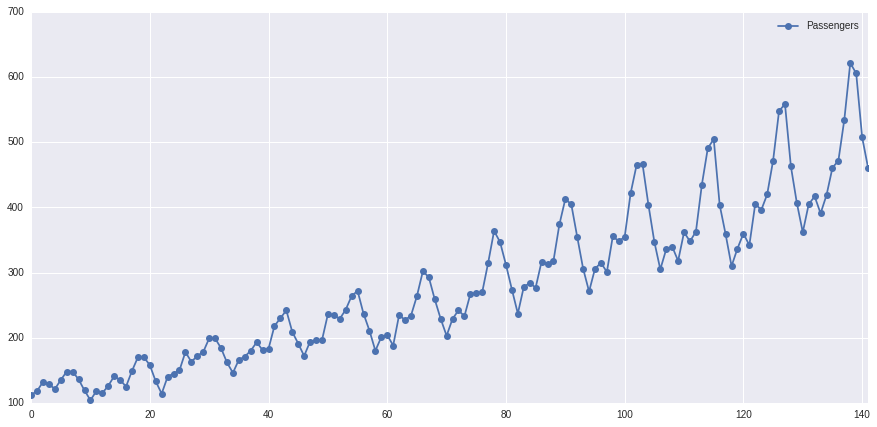

In [16]:
dataset = pandas.read_csv("Data/international-airline-passengers.csv", usecols=[1], engine='python', skipfooter=3,sep=";")
dataset.plot(figsize=(15,7),legend=True,linestyle='-',marker='o')

In [17]:
dataset.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


# Long Short-Term Memory Networks 

It can be used to create large recurrent networks, that in turn can be used to address difficult sequence problems in machine learning and achieve state-of-the-art results.

Instead of neurons, LSTM networks have memory blocks that are connected into layers.

A block has components that make it smarter than a classical neuron and a memory for recent sequences. A block contains gates that manage the block’s state and output. A block operates upon an input sequence and each gate within a block uses the sigmoid activation units to control whether they are triggered or not, making the change of state and addition of information flowing through the block conditional.

There are three types of gates within a unit:

    Forget Gate: conditionally decides what information to throw away from the block.
    Input Gate: conditionally decides which values from the input to update the memory state.
    Output Gate: conditionally decides what to output based on input and the memory of the block.

Each unit is like a mini-state machine where the gates of the units have weights that are learned during the training procedure.

# LSTM Network For Regression

###  What is regression ? 

    Regression is that we want to have as output a numerical value instead of classes

   To do so, we will write a lag function as follows : 
   
           F_target(t) = F(t+1)

In [16]:
# We will use Keras library
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# And Scikit-Learn
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [17]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [51]:
#dataframe = pandas.read_csv('Data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3,sep=';')

#  Here we take only the raw values dataframe['Passengers'] ! = dataframe.values

dataframe = pandas.read_csv("Data/training_data.csv", usecols=["cpu.wait_perc"], engine='python',sep=";")

dataset = dataframe.values
dataset = dataset.astype('float32')
dataset;

### a -  Preprocessing: Normalizing the data

In [52]:
# normalize the dataset thanks to scikit-learn
scaler = MinMaxScaler(feature_range=(2.3, 18.1))
dataset = scaler.fit_transform(dataset)
dataset;


In [49]:
dframe.min()

cpu.wait_perc    2.3
predict          0.0
dtype: float64

### b - spliting the data for futur testing 

In [53]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(402, 199)


### c - Creating a new DataSet with look_back

In [54]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [55]:
# X=t and Y=t+1
X, Y = create_dataset(dataset[1:10],1)

In [56]:
# reshape into X=t and Y=t+1

## The window 

look_back = 1

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: 

    data(X) = [samples, time steps, features].


In [57]:
trainX[0]

array([ 13.39999962], dtype=float32)

In [58]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [59]:
trainX[0]

array([[ 13.39999962]], dtype=float32)

Talk About the LSTM Architecture

## Training phase

#### The neuronal network has 1 input, a hidden layer with 4 LSTM blocks or neurons and an output layer that makes a single value prediction

In [81]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=60, batch_size=1, verbose=2)

Epoch 1/60
3s - loss: 176.3514
Epoch 2/60
3s - loss: 158.8241
Epoch 3/60
3s - loss: 142.6443
Epoch 4/60
3s - loss: 127.6969
Epoch 5/60
3s - loss: 113.8661
Epoch 6/60
3s - loss: 101.0719
Epoch 7/60
3s - loss: 89.2597
Epoch 8/60
3s - loss: 78.3881
Epoch 9/60
3s - loss: 68.4339
Epoch 10/60
3s - loss: 59.3500
Epoch 11/60
3s - loss: 51.0997
Epoch 12/60
3s - loss: 43.6321
Epoch 13/60
3s - loss: 36.9343
Epoch 14/60
3s - loss: 30.9906
Epoch 15/60
3s - loss: 25.7611
Epoch 16/60
3s - loss: 21.2068
Epoch 17/60
3s - loss: 17.2897
Epoch 18/60
3s - loss: 13.9877
Epoch 19/60
3s - loss: 11.2646
Epoch 20/60
3s - loss: 9.0720
Epoch 21/60
3s - loss: 7.3378
Epoch 22/60
3s - loss: 6.0180
Epoch 23/60
3s - loss: 5.0625
Epoch 24/60
3s - loss: 4.3867
Epoch 25/60
3s - loss: 3.9341
Epoch 26/60
3s - loss: 3.6531
Epoch 27/60
3s - loss: 3.4806
Epoch 28/60
3s - loss: 3.3804
Epoch 29/60
3s - loss: 3.2628
Epoch 30/60
3s - loss: 3.1492
Epoch 31/60


KeyboardInterrupt: 

## Prediction 

In [61]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=1)
trainScore = math.sqrt(trainScore)
trainScore = scaler.inverse_transform(numpy.array([[trainScore]]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = model.evaluate(testX, testY, verbose=1)
testScore = math.sqrt(testScore)
testScore = scaler.inverse_transform(numpy.array([[testScore]]))
print('Test Score: %.2f RMSE' % (testScore))

400/400 [==============================] - 0s     
Train Score: 1.49 RMSE
 32/197 [===>..........................] - ETA: 0sTest Score: 1.75 RMSE


## Visualization

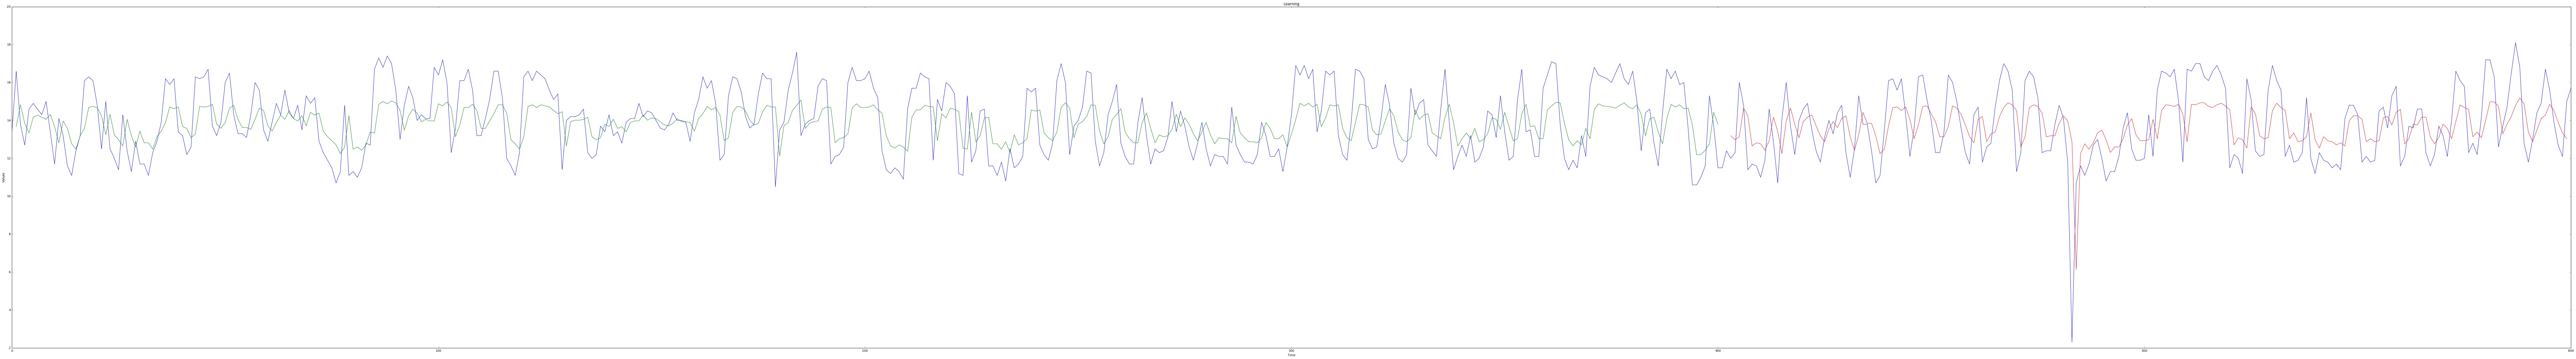

In [62]:
# generate predictions for training
trainPredict = model.predict(trainX,verbose=0)
testPredict = model.predict(testX,verbose=0)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions


plt.figure(figsize=(150, 20), dpi=1000)
plt.title("Learning")
plt.xlabel("Time")
plt.ylabel("Values")
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)




plt.show()

In [63]:
## Saving the model
# serialize model to YAML
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


#  New script

In [30]:
#df_Ellis['predict'][0] = model.predict(df_Ellis['cpu.wait_perc'][0],verbose=0)

#df_Ellis['predict'][i] = model.predict(np.asanyarray([[[df_Ellis['cpu.wait_perc'].values[0]]]]),verbose=0)
'''df_Ellis['predict'] = 0
df_Ellis
df_Ellis['predict'][1] = model.predict(np.asanyarray([[[df_Ellis['cpu.wait_perc'].values[0]]]]),verbose=0)
df_Ellis'''
(float)(model.predict(np.asanyarray([[[df_Ellis['cpu.wait_perc'].values[3]]]]),verbose=0))*2

NameError: name 'df_Ellis' is not defined

In [ ]:
dataset1 = df_Ellis['cpu.wait_perc'].values
dataset1 = dataset.astype('float32')
model.predict(trainX,verbose=0); 
D1, A1 = to_vect2(dataset1,1)
model.predict(D1[-look_back-1:-look_back],verbose=0)
D1[-look_back-1:-look_back]

In [ ]:
T_end = strftime('%Y-%m-%dT%H:%M:%S.0Z', gmtime())
T_end


In [39]:
T_start = current_time(T=None,h=0.2)

ks = ksclient.KSClient(auth_url=KEYSTONE_URL, username=USERNAME, password=PASSWORD)
    # construct the mon client
monasca_client = client.Client(api_version, monasca_url, token=ks.token)


i=1;

print "============== Hello  ==============="


while(True): 
    T_end = strftime('%Y-%m-%dT%H:%M:%S.0Z', gmtime()) 
    
    print " \n \n ========= Step"+str(i)+" ======== \n \n "
    
    print " \n =========  Downloading please wait  =========== \n "
    
    metrics = get_metrics(names=['load.avg_1_min','cpu.wait_perc','net.out_packets_sec','cpu.system_perc','net.in_bytes_sec','mem.free_mb']);
    measurements = get_measurements(metrics,T_start,T_end)     
    df_Ellis= df_from_measurements2(filter(None, measurements), 'ellis.jaafar.com')
    z = 0.00;
    df_Ellis['predict']= z
    df_Ellis['Timestamp']=Timestamp(df_Ellis)
    df_Ellis.index.names = [None]
    df_Ellis = df_Ellis.reset_index(drop=True)
    df_Ellis = df_Ellis.set_index('Timestamp')    
    
###    
   
    dataset1 = df_Ellis['cpu.wait_perc'].values
    dataset1 = dataset1.astype('float32')

    D1, A1 = to_vect2(dataset1,1)

    for j in range(len(df_Ellis)):
        #if j>0:
        df_Ellis['predict'][j] = (float)(model.predict(np.asanyarray([[[df_Ellis['cpu.wait_perc'].values[j]]]]),verbose=0))*1    

    
###   


    print "  ===================   Synchronizing  =================================  "
    
    
    df_Ellis.to_csv('Data/data_df.csv',header=True,index=True,sep=';',columns=['cpu.wait_perc','predict'])
    
    
    
    i += 1;
    time.sleep(10)

NameError: name 'current_time' is not defined

In [35]:
def monasca_connect():
    
    KEYSTONE_URL = 'http://157.159.232.218:35357/v3/'
    PROJECT_NAME = 'mini-mon'
    USERNAME = 'mini-mon'
    PASSWORD = 'password'
    api_version = '2_0'
    monasca_url = 'http://157.159.232.217:8070/v2.0/'
    # Authenticate to Keystone
    keystone_url = 'http://157.159.232.218:35357/v3/'
    ks = ksclient.KSClient(auth_url=KEYSTONE_URL, username=USERNAME, password=PASSWORD)
        # construct the mon client
    monasca_client = client.Client(api_version, monasca_url, token=ks.token)
    print 'monasca connected'
    return True

def store_data(pathname='Data/training_data.csv',ts=current_time(T=None,h=5)):
    print 'writing the data in >>>> '+pathname 
    
    T_start = ts
    T_end = strftime('%Y-%m-%dT%H:%M:%S.0Z', gmtime())
    metrics = get_metrics(names=['cpu.wait_perc']);
    measurements = get_measurements(metrics,T_start,T_end)
    dframe= df_from_measurements2(filter(None, measurements), 'ellis.jaafar.com')
    '''z = 0.00;
    df_Ellis['predict']= z
    '''
    dframe['Timestamp']=Timestamp(dframe)
    dframe.index.names = [None]
    dframe = dframe.reset_index(drop=True)
    dframe = dframe.set_index('Timestamp')    
    dframe.to_csv('Data/training_data.csv',header=True,index=True,sep=';')
    return True

monasca_connect()
store_data()

NameError: name 'current_time' is not defined

In [37]:
df_Ellis = dframe;
df_Ellis.head()

,cpu.wait_perc
Timestamp,
1.474387e+09,13.4
1.474387e+09,16.6
1.474387e+09,13.8
1.474387e+09,12.7
1.474388e+09,14.6


In [38]:
dataset1 = df_Ellis['cpu.wait_perc'].values
dataset1 = dataset.astype('float32')
     
D1, A1 = to_vect2(dataset1,1)
   
for j in range(len(df_Ellis)):
    df_Ellis['predict'][j] = (float)(model.predict(np.asanyarray([[[df_Ellis['cpu.wait_perc'].values[j]]]]),verbose=0))*2    


NameError: name 'to_vect2' is not defined

In [37]:
df_Ellis

NameError: name 'df_Ellis' is not defined

In [39]:
KEYSTONE_URL = 'http://157.159.232.218:35357/v3/'
PROJECT_NAME = 'mini-mon'
USERNAME = 'mini-mon'
PASSWORD = 'password'

In [40]:
api_version = '2_0'
monasca_url = 'http://157.159.232.217:8070/v2.0/'
# Authenticate to Keystone
keystone_url = 'http://157.159.232.218:35357/v3/'

ks = ksclient.KSClient(auth_url=KEYSTONE_URL, username=USERNAME, password=PASSWORD)
    # construct the mon client
monasca_client = client.Client(api_version, monasca_url, token=ks.token)



# Initialize environment variables to use the Monasca CLI
%env OS_PROJECT_NAME=$PROJECT_NAME
%env OS_PASSWORD=$PASSWORD
%env OS_AUTH_URL=$KEYSTONE_URL
%env OS_USERNAME=$USERNAME
#%env OS_TEST="test"

env: OS_PROJECT_NAME=mini-mon
env: OS_PASSWORD=password
env: OS_AUTH_URL=http://157.159.232.218:35357/v3/
env: OS_USERNAME=mini-mon


In [46]:
metrics = get_metrics(names=['load.avg_1_min','cpu.wait_perc','net.out_packets_sec','cpu.system_perc','net.in_bytes_sec','mem.free_mb']);
measurements = get_measurements(metrics,"2016-09-01T11:51:26.0Z","2016-09-01T12:53:26.0Z")
raw = filter(None, measurements)
df_Ellis=df_from_measurements2(raw, 'ellis.jaafar.com')

In [40]:
# getting the metrics information
def get_metrics(names=[None], dimensions={}, limit=25):
    metrics = []
    for name in names:
        # Invoke the Monasca client
        metrics = metrics + monasca_client.metrics.list(name=name, dimensions=dimensions,limit=limit)
    return metrics

# function get measurements
def get_measurements(metrics, start_time = None, end_time = None, limit=None):
    measurements = []

    if start_time == None:
        start_date = datetime.datetime.utcnow() - datetime.timedelta(seconds=3600)
        start_time = start_date.strftime("%Y-%m-%dT%H:%M:%SZ")

    if end_time == None:
        end_date = datetime.datetime.utcnow() - datetime.timedelta(seconds=0)
        end_time = end_date.strftime("%Y-%m-%dT%H:%M:%SZ")

    for metric in metrics:
        # Invoke the Monasca client
        measurements.append(monasca_client.metrics.list_measurements(
                name=metric['name'],
                dimensions=metric['dimensions'],
                start_time=start_time,
                end_time=end_time))

    return measurements





def df_from_measurements2(raw, group):
    i=0
    log=0;
    df = pd.DataFrame()
    for s in raw:
        if s[0]['measurements'] and s[0]['dimensions']['hostname'] == group:
            m = np.array(s[0]['measurements'])
            timestamps = m[:, s[0]['columns'].index('timestamp')]
            df = pd.DataFrame(index = timestamps)
            break;
    m=0;
    for measure in raw:
        if measure[0]['measurements'] and measure[0]['dimensions']['hostname'] == group:
            hostname=group
            m = np.array(measure[0]['measurements'])
            timestamps = m[:, measure[0]['columns'].index('timestamp')]
            #df = pd.DataFrame(index = timestamps)
            #getting name
            if(log==1):
                print 'metric : \n'
                print measure[0]['name']
            name = measure[0]['name'];
            #getting dimensions
            if(log==1):
                print '\n Machine name : \n'
                print measure[0]['dimensions']['hostname']
            # Getting measurement
            if(log==1):
                print '\n measurements \n'
                print m#measure[0]['measurements']

            # Measurement into Array

            m = np.array(measure[0]['measurements'])


            timestamps = m[:, measure[0]['columns'].index('timestamp')]
            if(log==1):
                print timestamps


            values=m[:, measure[0]['columns'].index('value')]
            if(log==1):
                print '\n values \n '
                print values

            #vars()["df_"+str(i)] =  dict( zip( timestamps, m));

            df[name] = m[:, measure[0]['columns'].index('value')];

            if(log == 1):
                    print 'This is the dataframe'+'is'+name

            #vars()["df_"+str(i)]['hostname'] = hostname;

            if(log==1):
                print ' \n \n ***********  --------------- *********** \n'
            i=i+1;
    return df;




def Timestamp(df):
    tsp = np.array(df.index)
    i=0;
    for ind in tsp:
        tsp[i] = t.mktime(dt.datetime.strptime(repr(str(ind))[1:-1], '%Y-%m-%dT%H:%M:%S.%fZ').timetuple())
        i += 1;
    return tsp

#T is a string 
def current_time(T,h):
    if T:
        ts = t.mktime(dt.datetime.strptime(repr(str(T))[1:-1], '%Y-%m-%dT%H:%M:%S.%fZ').timetuple())
    #ts = datetime.datetime.fromtimestamp(ts_epoch).strftime('%Y-%m-%dT%H:%M:%S.%fZ')
    
    if T is None:
        ts_epoch = strftime('%Y-%m-%dT%H:%M:%S.0Z', gmtime())
        ts = t.mktime(dt.datetime.strptime(repr(str(ts_epoch))[1:-1], '%Y-%m-%dT%H:%M:%S.%fZ').timetuple())
        ts = ts - 60*60*h;
        s =  datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%dT%H:%M:%S.%fZ')
        
        
        
    return s

# Compute a the percentage change of an array
def percentage_change(X):
    return [100.0 * a1/a2 - 100 for a1, a2 in zip(X[1:], X)]


# df in percentage
def perc_df(df):
    for i in range(len(df.columns)):
        metric_name = df.columns[i]
        df[metric_name] = np.append([1],percentage_change(df[metric_name].values))
        
        
    return df

def to_vect(X,w):
    inputs = [[X[i+e] for e in range(w)] for i in range(len(X)-w)]
    targets = [[X[j+w]] for j in range(len(X)-w)]
    
    return inputs,targets

def to_vect2(X,w):
    inputs = [[X[i+e] for e in range(w)] for i in range(len(X)-w)]
    targets = [X[j+w] for j in range(len(X)-w)]
    
    return np.array(inputs),np.array(targets)

# getting the prediction in the form of an array
def get_prediction():
    i=0;
    for inp in inputs:
        error = pow(nn.predict(inputs[i])[0]-targets[i][0],2);
        print ' \n The input is : \n\n '+str(inputs[i])+'\n\n the target is : \n\n '+str(targets[i])+'\n\n the predicted value is : \n\n '+str(nn.predict(inputs[i]))+'\n\n The error is : \n\n '+str(error)+' \n\n *** \n\n '
        i += 1;
        time.sleep(5)
        

## For the démo 

In [41]:
dframe = pandas.read_csv("Data/training_data.csv",index_col='Timestamp',engine='python',sep=";")
dataset = dframe.values
dataset = dataset.astype('float32')
dataset


look_back = 1

trainX, trainY = create_dataset(dataset, look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

dframe.head()

,cpu.wait_perc
Timestamp,
1.474387e+09,13.4
1.474387e+09,16.6
1.474387e+09,13.8
1.474387e+09,12.7
1.474388e+09,14.6


In [51]:
'''from keras.models import model_from_yaml
# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_yaml(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
model = loaded_model;'''

'from keras.models import model_from_yaml\n# load YAML and create model\nyaml_file = open(\'model.yaml\', \'r\')\nloaded_model_yaml = yaml_file.read()\nyaml_file.close()\nloaded_model = model_from_yaml(loaded_model_yaml)\n# load weights into new model\nloaded_model.load_weights("model.h5")\nprint("Loaded model from disk")\nmodel = loaded_model;'

In [64]:
dframe['predict'] = 0.00;
Predict = 0.00
#r = dframe['cpu.wait_perc'].min()/
for i in range(len(dframe)):
    Predict = (float)(model.predict(np.asanyarray([[[dframe['cpu.wait_perc'].values[i]]]]),verbose=0))
    #print dframe['cpu.wait_perc'].values[i]
    if i < len(dframe)-1:
        dframe['predict'].values[i+1] = (float)(Predict) #(float)(scaler.inverse_transform(np.asanyarray([[Predict]]))[0][0])

In [65]:
model.predict(np.asanyarray([[[dframe['cpu.wait_perc'].values[0]]]]),verbose=0)*10

array([[ 136.72395325]], dtype=float32)

In [66]:
dframe['cpu.wait_perc'].values[0]

13.4

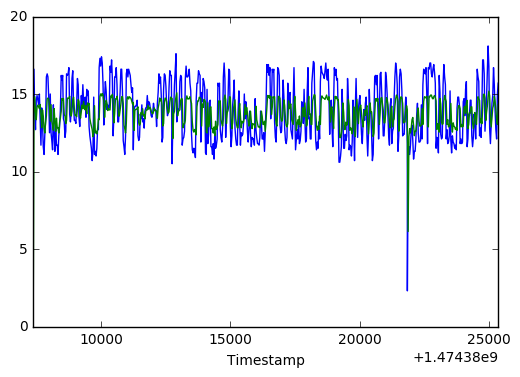

In [67]:
dframe['cpu.wait_perc'].plot()
dframe['predict'].plot()

In [68]:
dframe.to_csv("Data/data_with_predictions.csv",header=True,index=True,sep=';')

In [ ]:
dframe.from_csv("Data/data_with_predictions.csv")

In [82]:
for i in xrange(len(dframe)):
    if i != 0:
        dframe.head(i).to_csv('Data/data_demo.csv',header=True,index=True,sep=';')
        time.sleep(2)
        print ("step ", i)

('step ', 1)
('step ', 2)
('step ', 3)
('step ', 4)
('step ', 5)
('step ', 6)
('step ', 7)
('step ', 8)
('step ', 9)
('step ', 10)
('step ', 11)
('step ', 12)
('step ', 13)
('step ', 14)
('step ', 15)
('step ', 16)
('step ', 17)
('step ', 18)
('step ', 19)
('step ', 20)
('step ', 21)
('step ', 22)
('step ', 23)
('step ', 24)
('step ', 25)
('step ', 26)
('step ', 27)
('step ', 28)
('step ', 29)
('step ', 30)
('step ', 31)
('step ', 32)
('step ', 33)
('step ', 34)
('step ', 35)
('step ', 36)
('step ', 37)
('step ', 38)
('step ', 39)
('step ', 40)
('step ', 41)
('step ', 42)
('step ', 43)
('step ', 44)
('step ', 45)
('step ', 46)
('step ', 47)
('step ', 48)
('step ', 49)
('step ', 50)
('step ', 51)
('step ', 52)
('step ', 53)
('step ', 54)
('step ', 55)
('step ', 56)
('step ', 57)
('step ', 58)
('step ', 59)
('step ', 60)
('step ', 61)
('step ', 62)
('step ', 63)
('step ', 64)
('step ', 65)
('step ', 66)
('step ', 67)
('step ', 68)
('step ', 69)
('step ', 70)
('step ', 71)
('step ', 72)
(

In [4]:
dframe = pandas.read_csv("Data/training_data.csv",index_col='Timestamp',engine='python',sep=";")


In [10]:
dframe.dtypes

cpu.wait_perc    float64
dtype: object

In [70]:

dframe.tail()

,cpu.wait_perc,predict
Timestamp,,
1.474405e+09,13.9,14.524460
1.474405e+09,12.7,13.890781
1.474405e+09,12.1,13.341814
1.474405e+09,15.0,13.035996
1.474405e+09,15.7,14.319512


,cpu.wait_perc
Timestamp,
1970-01-01 00:00:01.473837573,11.9
1970-01-01 00:00:01.473837603,13.3
1970-01-01 00:00:01.473837633,10.4
1970-01-01 00:00:01.473837663,11.0
1970-01-01 00:00:01.473837693,13.3
1970-01-01 00:00:01.473837723,13.3
1970-01-01 00:00:01.473837753,13.1
1970-01-01 00:00:01.473837783,14.8
1970-01-01 00:00:01.473837813,13.8


In [7]:
from pandas import DataFrame as df
dframe = df.from_csv("Data/data_with_predictions.csv",index_col='Timestamp',sep=";")

In [8]:
dframe.head()

,cpu.wait_perc,predict
Timestamp,,
1.474387e+09,13.4,0.000000
1.474387e+09,16.6,13.672395
1.474387e+09,13.8,14.824037
1.474387e+09,12.7,13.848292
1.474388e+09,14.6,13.341814


In [19]:
if 1474387501.0 in dframe.index:
    print True
else:
    print False

False


In [17]:
dframe.index

Float64Index([1474387381.0, 1474387411.0, 1474387441.0, 1474387471.0,
              1474387500.0, 1474387531.0, 1474387561.0, 1474387591.0,
              1474387621.0, 1474387651.0,
              ...
              1474405083.0, 1474405113.0, 1474405143.0, 1474405173.0,
              1474405203.0, 1474405233.0, 1474405263.0, 1474405293.0,
              1474405323.0, 1474405353.0],
             dtype='float64', name=u'Timestamp', length=601)